<a href="https://colab.research.google.com/github/rapcool2312/Fraud-Detection/blob/master/C_C_F_D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing the Dependencies
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [ ]:
# loading the dataset to a Pandas DataFrame 
data = pd.read_csv('creditcard.csv')

# Data Pre-processing

In [ ]:
# First 5 rows of dataset
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Last 5 rows of Dataset
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [ ]:
# dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# checking the number of missing values in each column
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
# compare the values for both transactions
# for checking is it good or bad sample

data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [ ]:
# Distribution of the two classes
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
# This is Highly Imbalanced Dataset
# 0 --> Legit Transaction
# 1 --> Fraud Transaction

# seperating the legit and fradulent transactions

legit = data[data.Class == 0]
fraud = data[data.Class == 1]

In [ ]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


# Under- Sampling

In [ ]:
#Build a sample dataset containing similar distribution of Legit & fraud Transaction
#Number of Fraud Transaction = 492

legit_sample = legit.sample(n=492)

print(legit_sample.shape)

In [ ]:
# Concatenate the Two Dtaframes
new_dataset = pd.concat([legit_sample, fraud], axis = 0)

In [ ]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
42862,41277.0,-1.074106,1.096363,2.079393,1.920161,0.531325,-0.606831,0.717005,0.079836,-0.913854,...,-0.039540,-0.129027,-0.288220,0.612561,0.604701,-0.026450,0.023577,0.095869,18.28,0
250998,155161.0,1.994310,-0.442934,-0.252742,0.472089,-0.788334,-0.519766,-0.640356,-0.061984,1.248797,...,0.154971,0.678710,0.142816,-0.046966,-0.256579,0.574817,-0.018438,-0.047456,11.50,0
51951,45207.0,1.312591,0.077230,-1.292059,-0.483715,2.139937,3.181316,-0.505961,0.805039,-0.073990,...,-0.343094,-1.148139,0.095887,0.946086,0.369966,0.110699,-0.021706,0.023518,1.29,0
75068,55884.0,1.352265,-1.117900,-0.269259,-1.776264,0.731357,3.745376,-1.861159,1.026008,-0.321680,...,0.400362,0.907622,-0.143413,1.050973,0.466534,-0.030606,0.055346,0.031600,40.00,0
221536,142601.0,2.037714,0.287805,-1.724395,0.536510,0.298728,-1.430321,0.346533,-0.434105,0.420961,...,0.211597,0.835479,-0.033215,-0.055894,0.272865,-0.102501,0.008093,-0.026110,8.99,0


In [ ]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [ ]:
# distribution of legit transaction & fraudalent transaction
new_dataset['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [ ]:
new_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 984 entries, 42862 to 281674
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    984 non-null    float64
 1   V1      984 non-null    float64
 2   V2      984 non-null    float64
 3   V3      984 non-null    float64
 4   V4      984 non-null    float64
 5   V5      984 non-null    float64
 6   V6      984 non-null    float64
 7   V7      984 non-null    float64
 8   V8      984 non-null    float64
 9   V9      984 non-null    float64
 10  V10     984 non-null    float64
 11  V11     984 non-null    float64
 12  V12     984 non-null    float64
 13  V13     984 non-null    float64
 14  V14     984 non-null    float64
 15  V15     984 non-null    float64
 16  V16     984 non-null    float64
 17  V17     984 non-null    float64
 18  V18     984 non-null    float64
 19  V19     984 non-null    float64
 20  V20     984 non-null    float64
 21  V21     984 non-null    float64


In [ ]:
new_dataset.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
print(legit_sample.shape)
print(fraud.shape)

(492, 31)
(492, 31)


In [ ]:
legit_sample.Amount.describe()

count     492.000000
mean       81.130772
std       274.070186
min         0.000000
25%         4.490000
50%        19.440000
75%        65.360000
max      3820.860000
Name: Amount, dtype: float64

In [ ]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [ ]:
# compare the values for both transactions
# for checking is it good or bad sample
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,95007.597561,-0.045516,0.105375,-0.044312,0.089033,0.028585,-0.016951,0.001402,0.002579,0.070108,...,-0.021264,0.010393,0.045579,-0.013779,-0.004984,0.036128,0.020202,-0.023304,-0.014952,81.130772
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


# Splitting the data into Features & Targets

In [ ]:
X = new_dataset.drop(columns='Class', axis = 1)
Y = new_dataset['Class']

In [ ]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
42862    41277.0 -1.074106  1.096363  2.079393  1.920161  0.531325 -0.606831   
250998  155161.0  1.994310 -0.442934 -0.252742  0.472089 -0.788334 -0.519766   
51951    45207.0  1.312591  0.077230 -1.292059 -0.483715  2.139937  3.181316   
75068    55884.0  1.352265 -1.117900 -0.269259 -1.776264  0.731357  3.745376   
221536  142601.0  2.037714  0.287805 -1.724395  0.536510  0.298728 -1.430321   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [ ]:
print(Y)

42862     0
250998    0
51951     0
75068     0
221536    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


In [ ]:
outlier_fraction = len(fraud)/float(len(legit_sample))
print(outlier_fraction)

1.0


In [ ]:
# Data Standardization

scaler = StandardScaler()
scaler.fit(X)

standardized_data = scaler.transform(X)

print(standardized_data)

X = standardized_data
Y = new_dataset['Class']

print(X)
print(Y)

#Splitting of data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

print(X.shape, X_train.shape, X_test.shape)

[[-0.96241891  0.24137338 -0.2093503  ... -0.04891128  0.15323993
  -0.31344924]
 [ 1.38959052  0.79631074 -0.62883289 ... -0.08996376 -0.18201567
  -0.33893382]
 [-0.88125389  0.67301877 -0.48707996 ... -0.09315735 -0.01599791
  -0.37731104]
 ...
 [ 1.682652    0.3133469  -0.20117395 ...  0.3043356   0.38362857
  -0.08938791]
 [ 1.6953534  -0.12752054 -0.34846925 ...  0.79265324 -0.66445126
   0.5387431 ]
 [ 1.70324272  0.79588866 -0.4649393  ... -0.06902931 -0.10681986
  -0.22229864]]
[[-0.96241891  0.24137338 -0.2093503  ... -0.04891128  0.15323993
  -0.31344924]
 [ 1.38959052  0.79631074 -0.62883289 ... -0.08996376 -0.18201567
  -0.33893382]
 [-0.88125389  0.67301877 -0.48707996 ... -0.09315735 -0.01599791
  -0.37731104]
 ...
 [ 1.682652    0.3133469  -0.20117395 ...  0.3043356   0.38362857
  -0.08938791]
 [ 1.6953534  -0.12752054 -0.34846925 ...  0.79265324 -0.66445126
   0.5387431 ]
 [ 1.70324272  0.79588866 -0.4649393  ... -0.06902931 -0.10681986
  -0.22229864]]
42862     0
2509

# Visulization 

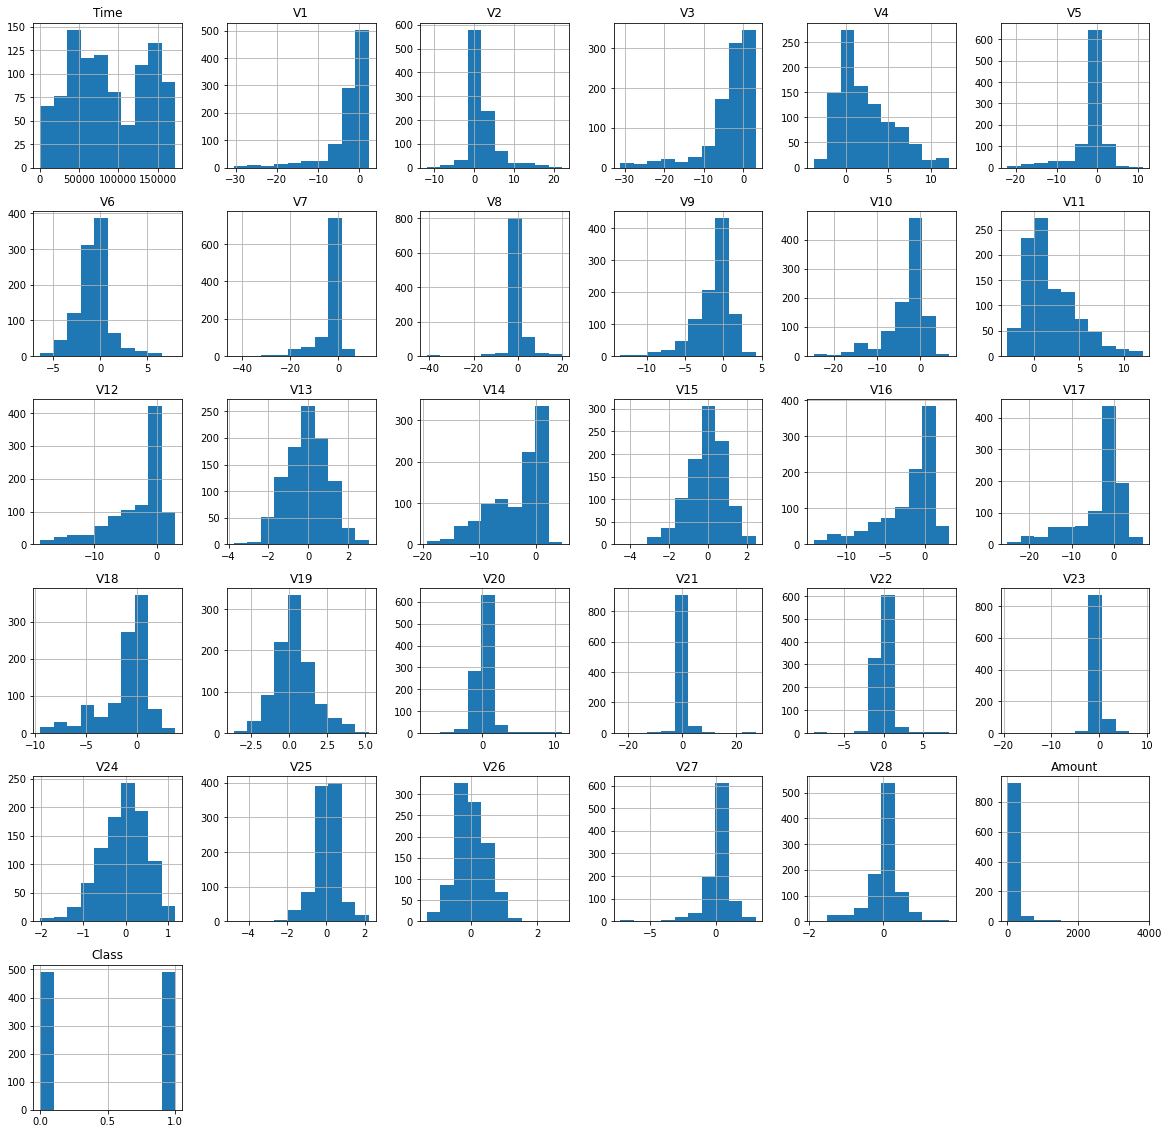

In [ ]:
import matplotlib.pyplot as plt
#Plot the Histogram of each parameter
new_dataset.hist(figsize=(20,20))
plt.show()

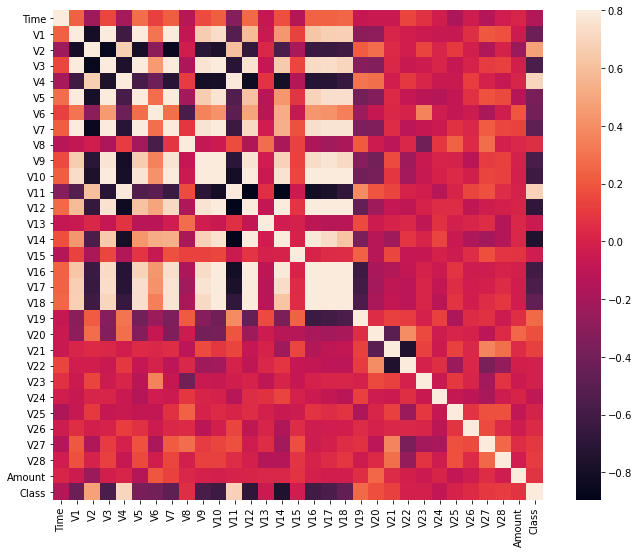

In [ ]:
# Correlation Matrix
import seaborn as sns
corrmat = new_dataset.corr()
fig = plt.figure(figsize=(12,9))

sns.heatmap(corrmat, vmax= .8, square = True)
plt.show()

# Model Training

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import KFold
import numpy as np
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
log_class=LogisticRegression()
grid={'C':10.0 **np.arange(-2,3), 'penalty':['l1','l2']}
cv = KFold(n_splits = 5, random_state = None, shuffle=False)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size = 0.75)

In [ ]:
clf = GridSearchCV(log_class, grid,cv=cv,n_jobs=-1,scoring='f1_macro')
clf.fit(X_train,Y_train)

C:\Users\Lavlesh\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.91252736        nan 0.93749388        nan 0.93756348
        nan 0.94034414        nan 0.93898938]
  warnings.warn(


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [ ]:
Y_pred=clf.predict(X_test)

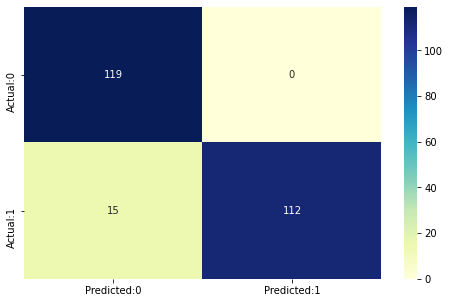

In [ ]:
# Confusion matrix

cm=confusion_matrix(Y_test,Y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

In [ ]:
#precision : False_Positive
    #recall    : False_Negative
    #f1-score  : Combination of Both

print(accuracy_score(Y_test,Y_pred))

0.9390243902439024


In [ ]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       119
           1       1.00      0.88      0.94       127

    accuracy                           0.94       246
   macro avg       0.94      0.94      0.94       246
weighted avg       0.95      0.94      0.94       246



# RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(criterion = 'gini', max_depth=10, min_samples_split=5, min_samples_leaf=1)
classifier.fit(X_train,Y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5)

In [ ]:
Y_pred = classifier.predict(X_test)

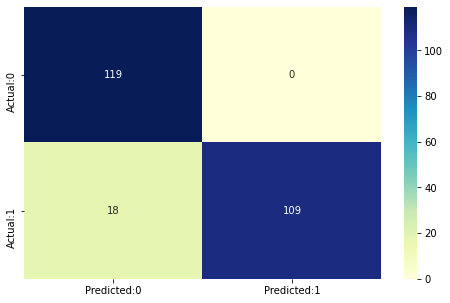

In [ ]:
# Confusion Matrix

cm = confusion_matrix(Y_test, Y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

In [ ]:
print(accuracy_score(Y_test,Y_pred))

0.926829268292683


In [ ]:
#precision : False_Positive
    #recall    : False_Negative
    #f1-score  : Combination of Both


print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       119
           1       1.00      0.86      0.92       127

    accuracy                           0.93       246
   macro avg       0.93      0.93      0.93       246
weighted avg       0.94      0.93      0.93       246



# CAT BOOST

In [ ]:
# pip install catboost

In [ ]:
#map categorical features
credit_catboost_ready_df = new_dataset.dropna()

features = [feat for feat in list(credit_catboost_ready_df) if feat != 'Class']
print(features)
card_categories = np.where(credit_catboost_ready_df[features].dtypes != np.float)[0]
card_categories

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']


array([], dtype=int64)

In [ ]:
SEED = 1234

from catboost import CatBoostClassifier

params = {
            'iterations': 2000,
            'learning_rate': 0.01,
            'cat_features': card_categories,
            'depth': 3,
            'eval_metric': 'AUC',
            'verbose': 200,
            'od_type': 'Iter', # overfit detector
            'od_wait': 500, # most recent best iteration to wait before stopping
            'random_seed': SEED
        }

cat_model = CatBoostClassifier(**params)
cat_model.fit(X_train, Y_train,
             eval_set = (X_test, Y_test),
             use_best_model= True, # True if we don't want to solve trees created after iteration with the best validation score
             plot = True
             );

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.9383974	best: 0.9383974 (0)	total: 153ms	remaining: 5m 5s
200:	test: 0.9769073	best: 0.9769073 (200)	total: 1.99s	remaining: 17.8s
400:	test: 0.9805465	best: 0.9806789 (386)	total: 3.13s	remaining: 12.5s
600:	test: 0.9810759	best: 0.9815391 (523)	total: 4.3s	remaining: 10s
800:	test: 0.9810759	best: 0.9816714 (667)	total: 5.48s	remaining: 8.21s
1000:	test: 0.9798187	best: 0.9816714 (667)	total: 6.82s	remaining: 6.81s
Stopped by overfitting detector  (500 iterations wait)

bestTest = 0.9816714087
bestIteration = 667

Shrink model to first 668 iterations.


In [ ]:
y_pred = cat_model.predict(X_test)

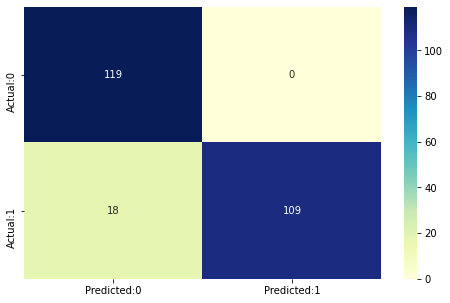

In [ ]:
# Confusion Matrix

cm = confusion_matrix(Y_test, y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

In [ ]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       119
           1       1.00      0.86      0.92       127

    accuracy                           0.93       246
   macro avg       0.93      0.93      0.93       246
weighted avg       0.94      0.93      0.93       246



# Making Predictive System

In [ ]:
from sklearn.preprocessing import StandardScaler

# Making Predictive System

input_data = (7351,-0.89429117128008,0.201823151075358,0.82055395947754,1.59422667830721,-0.126009429532425,-0.0768021842201572,0.323810905168392,-0.457621185859625,2.04590746305326,0.686281297706687,0.450803761969176,-3.61287869162481,-0.0589171005131909,1.48463210047471,1.16594348846158,-0.369946984084583,0.620335387342575,0.409903954277939,-0.127096753874042,-0.745508611944502,0.0538737279554308,0.961447463923887,0.4988788416289,-0.00252224593734589,-1.1112947683224,-0.385686863446657,-0.691469824330681,0.0475574382679638,64.9)

#input_data = (7543,0.329594333318222,3.71288929524103,-5.77593510831666,6.07826550560828,1.66735901311948,-2.42016841351562,-0.812891249491333,0.133080117970748,-2.21431131204961,-5.13445447110633,4.56072010550223,-8.87374836164535,-0.797483599628474,-9.17716637009146,-0.25702477514424,-0.871688490451564,1.31301362907797,0.773913872552923,-2.37059945059811,0.269772775978284,0.156617169389793,-0.652450440932299,-0.551572219392364,-0.716521635357197,1.41571661508922,0.555264739787582,0.530507388890912,0.404474054528712,1)
    
# Changing the input data to numpy array

input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting the one isinstance

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data

std_data = scaler.transform(input_data_reshaped)

print(std_data)

prediction = clf.predict(std_data) # Prediction with the Logistic Regression

#prediction = classifier.predict(std_data) # Prediction with the RandomForest

print(prediction)

if (prediction[0] == 0):
    print('Legit Transaction')
else:
    print('Fraud Transaction')

[[-1.66308162e+00  2.73893724e-01 -4.53126485e-01  7.02593135e-01
  -2.27576667e-01  3.39954434e-01  3.60598970e-01  5.29752235e-01
  -1.52197069e-01  1.41418034e+00  7.82048692e-01 -5.16213037e-01
  -1.06752509e-01  5.37775157e-04  1.05595036e+00  1.26352901e+00
   4.76746919e-01  6.60626955e-01  6.40963249e-01 -3.62822123e-01
  -8.10634725e-01 -1.09850354e-01  7.98266628e-01  4.36143870e-01
   9.65852837e-02 -1.73250399e+00 -8.67555879e-01 -7.47575636e-01
   4.02331818e-02 -1.38214558e-01]]
[0]
Legit Transaction
